In [1]:
import pandas as pd
import os
import numpy
import matplotlib.pyplot as plt

### The links for the videos used are: 
https://drive.google.com/file/d/1Ng4hhKPPEeJXfjcV83__z3OIQ1xdZWkH/view?usp=sharing

https://drive.google.com/file/d/1WayzzD6p6vylitslx-7iXeln1GNJiWex/view?usp=sharing

In [7]:
## Reading the OpenFace output CSV files and calculating scores for PSPI and Sum of AUs

NIR= r'C:\Users\Nischal\Desktop\BioVid_data_processing\NIRvsColor\IMG_0267.csv'
Color= r'C:\Users\Nischal\Desktop\BioVid_data_processing\NIRvsColor\IMG_0268.csv'
with open(Color, 'r'):
        df_search_csv = pd.read_csv(Color)
        
        # Initialize new CSV file with Columns:
        Final_DF = pd.DataFrame()

        Final_DF['AU_01r'] =  df_search_csv['AU01_r']
        Final_DF['AU_02r'] =  df_search_csv['AU02_r']
        Final_DF['AU_04r'] =  df_search_csv['AU04_r']
        Final_DF['AU_05r'] =  df_search_csv['AU05_r']
        Final_DF['AU_06r'] =  df_search_csv['AU06_r']
        Final_DF['AU_07r'] =  df_search_csv['AU07_r']
        Final_DF['AU_09r'] =  df_search_csv['AU09_r']
        Final_DF['AU_10r'] =  df_search_csv['AU10_r']
        Final_DF['AU_12r'] =  df_search_csv['AU12_r']
        Final_DF['AU_14r'] =  df_search_csv['AU14_r']
        Final_DF['AU_15r'] =  df_search_csv['AU15_r']
        Final_DF['AU_17r'] =  df_search_csv['AU17_r']
        Final_DF['AU_20r'] =  df_search_csv['AU20_r']
        Final_DF['AU_23r'] =  df_search_csv['AU23_r']
        Final_DF['AU_25r'] =  df_search_csv['AU25_r']
        Final_DF['AU_26r'] =  df_search_csv['AU26_r']
        Final_DF['AU_45r'] =  df_search_csv['AU45_r']

        Final_DF['AU_01c'] = df_search_csv['AU01_c']
        Final_DF['AU_02c'] = df_search_csv['AU02_c']
        Final_DF['AU_04c'] = df_search_csv['AU04_c']
        Final_DF['AU_05c'] = df_search_csv['AU05_c']
        Final_DF['AU_06c'] = df_search_csv['AU06_c']
        Final_DF['AU_07c'] = df_search_csv['AU07_c']
        Final_DF['AU_09c'] = df_search_csv['AU09_c']
        Final_DF['AU_10c'] = df_search_csv['AU10_c']
        Final_DF['AU_12c'] = df_search_csv['AU12_c']
        Final_DF['AU_14c'] = df_search_csv['AU14_c']
        Final_DF['AU_15c'] = df_search_csv['AU15_c']
        Final_DF['AU_17c'] = df_search_csv['AU17_c']
        Final_DF['AU_20c'] = df_search_csv['AU20_c']
        Final_DF['AU_23c'] = df_search_csv['AU23_c']
        Final_DF['AU_25c'] = df_search_csv['AU25_c']
        Final_DF['AU_26c'] = df_search_csv['AU26_c']
        Final_DF['AU_45c'] = df_search_csv['AU45_c']
        SUM_AU_r = df_search_csv['AU01_r'] + df_search_csv['AU02_r'] + df_search_csv['AU04_r'] \
                   + df_search_csv['AU05_r'] + df_search_csv['AU06_r'] + df_search_csv['AU07_r'] \
                   + df_search_csv['AU09_r'] + df_search_csv['AU10_r'] + df_search_csv['AU12_r'] \
                   + df_search_csv['AU14_r'] + df_search_csv['AU15_r'] + df_search_csv['AU17_r'] \
                   + df_search_csv['AU20_r'] + df_search_csv['AU23_r'] + df_search_csv['AU25_r'] \
                   + df_search_csv['AU26_r'] + df_search_csv['AU45_r']
        Final_DF['SUM_AU_r'] = numpy.asarray(SUM_AU_r)
#             SUM_AU_r

        row_count = df_search_csv.shape[0]
        PSPI = [0.0] * row_count
        indx = 0
        for index, row in df_search_csv.iterrows():
            PSPI[indx] = PSPI[indx] + row['AU04_r'] + max(row['AU06_r'],row['AU07_r']) + \
                 max(row['AU09_r'],row['AU10_r']) + row['AU45_r'] 
#                 + row['AU20_r'] + row['AU25_r']
                    # + max(row[' AU15_r'], row[' AU25_r']) + row[' AU45_r']
            indx = indx + 1


        Final_DF["PSPI_score"] = PSPI
#             numpy.asarray(PSPI)/15.0
        #PSPI/15.0
        Final_DF.to_csv(r'C:\Users\Nischal\Desktop\BioVid_data_processing\NIRvsColor\Color.csv', index=False)

print('File Done..')

File Done..


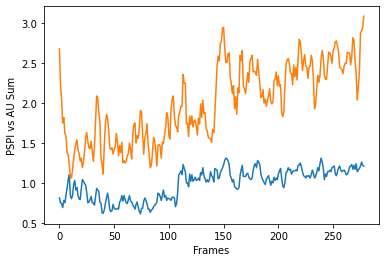

In [12]:
## Plotting Colour vs. NIR:

NIR_output = pd.read_csv(r'C:\Users\Nischal\Desktop\BioVid_data_processing\NIRvsColor\NIR.csv')
# Color_output = pd.read_csv(r'C:\Users\Nischal\Desktop\BioVid_data_processing\NIRvsColor\Color.csv')
NIR_PSPI=NIR_output['PSPI_score']
NIR_sum=NIR_output['SUM_AU_r']
plt.plot(NIR_PSPI)
plt.plot(NIR_sum)

plt.ylabel('PSPI vs AU Sum')
plt.xlabel('Frames')
plt.savefig('NIR_graphs.png')
# NIR_PSPI

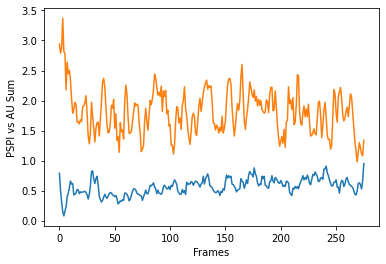

In [13]:
# NIR_output = pd.read_csv(r'C:\Users\Nischal\Desktop\BioVid_data_processing\NIRvsColor\Color.csv')
Color_output = pd.read_csv(r'C:\Users\Nischal\Desktop\BioVid_data_processing\NIRvsColor\Color.csv')
color_PSPI=Color_output['PSPI_score']
color_sum=Color_output['SUM_AU_r']
plt.plot(color_PSPI)
plt.plot(color_sum)

plt.ylabel('PSPI vs AU Sum')
plt.xlabel('Frames')
plt.savefig('Color_graphs.png')
